In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler

from matplotlib.ticker import NullFormatter
from matplotlib import gridspec

import scipy


from matplotlib.lines import Line2D

%matplotlib inline
%load_ext autoreload
sns.set_style('white')

In [2]:
lag_order_mat = pd.read_csv('MM_interactions_jan20.csv').set_index('Unnamed: 0')
store_lag_and_interaction = pd.read_csv('sli_jan18.csv')
store_focal =pd.read_csv('arrival_times_jan20.csv').set_index('Unnamed: 0')
data_bacteria = pd.read_csv('individual_infant_data_jan20.csv')
cur_matrix = pd.read_csv('microbiome_assembly_interactions_jan20.csv').set_index('Unnamed: 0')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     7.347
Date:                Wed, 20 Jan 2021   Prob (F-statistic):             0.0154
Time:                        16:59:04   Log-Likelihood:                 56.271
No. Observations:                  18   AIC:                            -108.5
Df Residuals:                      16   BIC:                            -106.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0015      0.001     -2.711      0.0

/Users/katcoyte/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


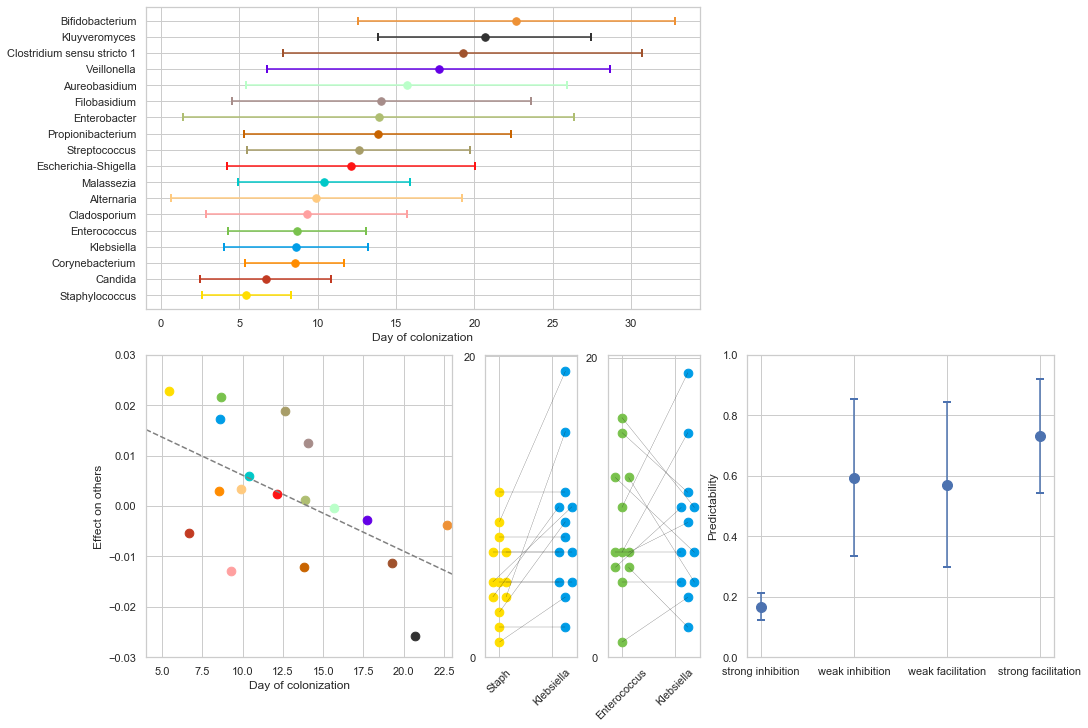

In [3]:
sns.set_style('whitegrid')
store_lag_and_interaction = store_lag_and_interaction.dropna()

colors_for_scatter = pd.DataFrame(columns=['c'])
colors_for_scatter.loc['Alternaria',:] = [[255, 202, 127]]
colors_for_scatter.loc['Aureobasidium','c'] = [186,255,201]
colors_for_scatter.loc['Bifidobacterium','c'] = [238,145,53]
colors_for_scatter.loc['Candida','c'] = [194, 59, 34]
colors_for_scatter.loc['Clostridium_sensu_stricto_1','c'] = [160,82,45]
colors_for_scatter.loc['Clostridium sensu stricto 1','c'] = [160,82,45]
colors_for_scatter.loc['Corynebacterium','c'] = [255,140,0]
colors_for_scatter.loc['Enterobacter','c'] = [175, 190, 114]
colors_for_scatter.loc['Enterococcus','c'] =  [121, 194, 77]
colors_for_scatter.loc['Escherichia_Shigella','c'] = [255, 20, 20]
colors_for_scatter.loc['Escherichia-Shigella','c'] = [255, 20, 20]
colors_for_scatter.loc['Filobasidium','c'] = [167,141,138]
colors_for_scatter.loc['Klebsiella','c'] = [0, 157, 231]
colors_for_scatter.loc['Kluyveromyces','c'] = [50, 50, 50]
colors_for_scatter.loc['Malassezia','c'] =  [0, 200, 200]
colors_for_scatter.loc['Propionibacterium','c'] = [200,100,0]
colors_for_scatter.loc['Streptococcus','c'] = [167, 157, 104]
colors_for_scatter.loc['Staphylococcus','c'] = [255, 222, 0]
colors_for_scatter.loc['Veillonella','c'] = [100, 0, 230]
colors_for_scatter.loc['Cladosporium','c'] = [255, 160, 160]


fig = plt.figure(constrained_layout=True, figsize=(15, 10))

gs = fig.add_gridspec(6, 9)
arr_time = fig.add_subplot(gs[0:3, :6])
part_foc = fig.add_subplot(gs[3:6, 0:3])
eff_oth = fig.add_subplot(gs[3:6, 6:9])
staph_klebs = fig.add_subplot(gs[3:6, 3])
ent_klebs = fig.add_subplot(gs[3:6, 5])

set_val=0.1
set1 = store_lag_and_interaction.loc[store_lag_and_interaction.interac<-set_val,'lagtime']
set2 = store_lag_and_interaction.loc[store_lag_and_interaction.interac<0.0,:]
set2 = set2.loc[set2.interac>-set_val,'lagtime']
set3 = store_lag_and_interaction.loc[store_lag_and_interaction.interac<set_val,:]
set3 = set3.loc[set3.interac>=0,'lagtime']
set4 = store_lag_and_interaction.loc[store_lag_and_interaction.interac>set_val,'lagtime']

my_means=[np.mean(set1),np.mean(set2),np.mean(set3),np.mean(set4)]
my_stds = [np.std(set1),np.std(set2),np.std(set3),np.std(set4)]

eff_oth.errorbar(range(0,len(my_means)),
             my_means,
             yerr=my_stds,
             ls='',
             marker='o',
            ms=10,
            capsize=4,
                capthick=2)
eff_oth.set_xticks([0,1,2,3])
eff_oth.set_xticklabels(['strong inhibition','weak inhibition','weak facilitation','strong facilitation'])
eff_oth.set_ylabel('Predictability')
eff_oth.set_ylim([0,1])


#############
#############


for ix in colors_for_scatter.index:
    tmptmp = colors_for_scatter.loc[ix,'c'].copy()
    tmptmp =[x / 255 for x in tmptmp]
    
    colors_for_scatter.loc[ix,'c'] = tmptmp
    


yvals = range(len(store_focal))
for cc,ix in enumerate(store_focal.index):
    
    arr_time.errorbar(store_focal.loc[ix, 'my_mean'],
                 yvals[cc],
                 xerr=store_focal.loc[ix, 'my_std'],
                 marker='o',
                 ms=7.5,
                 linestyle='',
                 color=colors_for_scatter.loc[ix, 'c'],
                capsize=4,
                capthick=2)
    arr_time.set_yticklabels(store_focal.index)
    

    
arr_time.set_yticks(range(len(store_focal)))

arr_time.set_xlabel('Day of colonization')



################
################


focal_species = 'Staphylococcus'
partner_species = 'Klebsiella'

first_appearance = pd.DataFrame(columns = ['staph', 'klebs'])
for baby in data_bacteria.babyid:
    try:
        c_bacteria = data_bacteria.loc[data_bacteria.babyid==baby,:]
        c_bacteria = c_bacteria.sort_values(by='day')
        c_staph = c_bacteria[['day', focal_species]]
        c_staph = c_staph.loc[c_staph[focal_species] > 0, :]
        first_appearance.loc[baby, 'staph'] = int(c_staph.iloc[0,0])

        c_klebs = c_bacteria[['day', partner_species]]
        c_klebs = c_klebs.loc[c_klebs[partner_species] > 0, :]
        first_appearance.loc[baby, 'klebs'] = int(c_klebs.iloc[0,0])
    except:
        'missing'
    
    
befores = pd.DataFrame(first_appearance.staph)
afters = pd.DataFrame(first_appearance.klebs)

x_vals = pd.DataFrame(0, columns=['x_val'], index=befores.index)
for val in np.unique(befores.values):
    cur_val = befores.loc[befores.staph==val,:]
    if len(cur_val) > 1:
        new_x_vals = np.linspace(-0.1,0.1,len(cur_val))
        ii=0
        for ix in cur_val.index:
            x_vals.loc[ix, 'x_val'] = new_x_vals[ii]
            ii=ii+1

x_vals_k = pd.DataFrame(1, columns=['x_val'], index=afters.index)
for val in np.unique(afters.values):
    cur_val = afters.loc[afters.klebs==val,:]
    if len(cur_val) > 1:
        new_x_vals = np.linspace(-0.1,0.1,len(cur_val))
        ii=0
        for ix in cur_val.index:
            x_vals_k.loc[ix, 'x_val'] = 1+new_x_vals[ii]
            ii=ii+1


# plotting the points
staph_klebs.scatter(x_vals, befores, color=colors_for_scatter.loc['Staphylococcus','c'], s=75)
staph_klebs.scatter(x_vals_k, afters, color=colors_for_scatter.loc['Klebsiella','c'], s=75)

# plotting the lines
for i in befores.index:
    staph_klebs.plot( [x_vals.loc[i,'x_val'], x_vals_k.loc[i,'x_val']],
             [befores.loc[i,'staph'], afters.loc[i,'klebs']], c='k', linewidth=0.2)
              
staph_klebs.set_xticks([0,0.8])
staph_klebs.set_xticklabels(['Staph', 'Klebsiella'], rotation=45)
staph_klebs.set_yticks([0,20])


##################
##################


focal_species = 'Enterococcus'
partner_species = 'Klebsiella'

first_appearance = pd.DataFrame(columns = ['staph', 'klebs'])
for baby in data_bacteria.babyid:
    try:
        c_bacteria = data_bacteria.loc[data_bacteria.babyid==baby,:]
        c_bacteria = c_bacteria.sort_values(by='day')
        c_staph = c_bacteria[['day', focal_species]]
        c_staph = c_staph.loc[c_staph[focal_species] > 0, :]
        first_appearance.loc[baby, 'staph'] = int(c_staph.iloc[0,0])

        c_klebs = c_bacteria[['day', partner_species]]
        c_klebs = c_klebs.loc[c_klebs[partner_species] > 0, :]
        first_appearance.loc[baby, 'klebs'] = int(c_klebs.iloc[0,0])
    except:
        'missing'
    
    
befores = pd.DataFrame(first_appearance.staph)
afters = pd.DataFrame(first_appearance.klebs)

x_vals = pd.DataFrame(0, columns=['x_val'], index=befores.index)
for val in np.unique(befores.values):
    cur_val = befores.loc[befores.staph==val,:]
    if len(cur_val) > 1:
        new_x_vals = np.linspace(-0.1,0.1,len(cur_val))
        ii=0
        for ix in cur_val.index:
            x_vals.loc[ix, 'x_val'] = new_x_vals[ii]
            ii=ii+1

x_vals_k = pd.DataFrame(1, columns=['x_val'], index=afters.index)
for val in np.unique(afters.values):
    cur_val = afters.loc[afters.klebs==val,:]
    if len(cur_val) > 1:
        new_x_vals = np.linspace(-0.1,0.1,len(cur_val))
        ii=0
        for ix in cur_val.index:
            x_vals_k.loc[ix, 'x_val'] = 1+new_x_vals[ii]
            ii=ii+1


# plotting the points
ent_klebs.scatter(x_vals, befores, color=colors_for_scatter.loc['Enterococcus','c'], s=75)
ent_klebs.scatter(x_vals_k, afters, color=colors_for_scatter.loc['Klebsiella','c'], s=75)

# plotting the lines
for i in befores.index:
    ent_klebs.plot( [x_vals.loc[i,'x_val'], x_vals_k.loc[i,'x_val']],
             [befores.loc[i,'staph'], afters.loc[i,'klebs']], c='k', linewidth=0.2)
              
ent_klebs.set_xticks([0,0.8])
ent_klebs.set_yticks([0,20])
ent_klebs.set_xticklabels(['Enterococcus', 'Klebsiella'], rotation=45)


##################################
###############################

tmp = pd.DataFrame(cur_matrix.loc[cur_matrix.index, cur_matrix.index]).copy()
tmp = tmp.mean(0)
store_focal = store_focal.rename(index={'Clostridium sensu stricto 1':'Clostridium_sensu_stricto_1'})
store_focal = store_focal.rename(index={'Escherichia-Shigella':'Escherichia_Shigella'})

arrival_and_ints = pd.concat([store_focal,
                               pd.DataFrame(tmp)],1)

my_y = arrival_and_ints[0]
my_x = arrival_and_ints['my_mean']


for cc,ix in enumerate(arrival_and_ints.index):
    
    part_foc.scatter(arrival_and_ints.loc[ix,'my_mean'],
                 arrival_and_ints.loc[ix,0],
                 marker='o',
                 s = 75,
                 color=colors_for_scatter.loc[ix, 'c'])

my_y = arrival_and_ints[0].values.astype(float)
my_x = arrival_and_ints['my_mean'].values.astype(float)


part_foc.set_xlabel('Day of colonization')
part_foc.set_ylabel('Effect on others')

part_foc.set_ylim([-0.03,0.03])
part_foc.set_xlim([4,23])


my_x = sm.add_constant(my_x, prepend=False)

import statsmodels.api as sm

mod_ab = sm.OLS(my_y, my_x)
res_ab = mod_ab.fit()


print(res_ab.summary())


xvals = [4, 24]
yvals = res_ab.params[1] + res_ab.params[0]*np.array(xvals)

part_foc.plot(xvals, yvals, 'gray',ls='--')

